# Exercise: Daily returns of US stock market indices

In this exercise, we examine how the three major US stock market indices performed this year.
Use the data in `indices.csv` from the folder `../data/stockmarket` to solve the following tasks:

1.  Load the CSV data and restrict the sample to the calendar year 2024. 

    *Hint:* You have to first figure out which character is used to separate individual columns.

    *Hint:* You should use `pd.read_csv(..., parse_dates=['Date'])` to automatically parse strings stored in the `Date` column as dates.

2.  The data comes in a "long" format where each date-ticker combination is stored in 
    a separate row. For the following analysis, the data needs to be reshaped such that each 
    ticker symbol is in its own column ("wide" format).

    Use the [`pivot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)
    method to reshape the `DataFrame` into the desired form. Consult the 
    [user guide](https://pandas.pydata.org/docs/user_guide/reshaping.html#pivot-and-pivot-table)
    to see a graphical illustration.

    Your pivoted `DataFrame` should look as follows:
    ```
        Ticker	DJIA	NASDAQ	SP500
    Date			
    2024-01-02	37715.0	14765.9	4742.8
    2024-01-03	37430.2	14592.2	4704.8
    ```
3.  Create a line plot which shows the time series for each of the three ticker symbols in a single graph,
    for example using [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot).
4.  The graph you just created is not very satisfactory as the three
    indices are recorded on vastly different scales. Express each index
    relative to its initial value in 2024 (so that all three start with the value
    1.0) and recreate the previous graph with this normalized data.
5.  Another way to check whether the three indices are co-moving is to compute and plot their daily returns.
    For each index, compute the daily returns, i.e., the relative change vs. the previous closing price in percent (e.g., using 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)), 
    and plot the three time series of daily returns in a single graph.
6.  The previous plots suggests that the three indices co-move a lot. 
    
    1.  In order to quantify the strength of 
        this co-movement, compute the pairwise correlations of daily returns using 
        [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

    2.  Create a figure with 3-by-3 subplots where each off-diagonal plot shows the 
        scatter plot for two of the indices.
    
        *Hint:* You can use the function [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) to accomplish this task. Alternatively, you can create a figure with 3-by-3 subplots using Matplotlib's 
        [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html), iterate over all rows and columns and add a [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) plot to each `axes` object.

    3.  Add the correlation coefficient for each stockmarket index pair 
        as text to the corresponding subplot in the figure you created
        (this can be done using [`text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)).

## Solution

#### Part (1)

In [2]:
# Uncomment this to use files in the local data/stockmarket directory
DATA_PATH = '../data/stockmarket'

# Uncomment this to load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/TECH2-H24/main/data/stockmarket'

In [3]:
import pandas as pd

# path to CSV file
path = f'{DATA_PATH}/indices.csv'

# Parse data using tab character as separator
df = pd.read_csv(path, sep='\t', parse_dates=['Date'])

# Restrict dates to year 2024
df = df.loc[df['Date'] >= '2024']

# Reset to default index
df = df.reset_index(drop=True)

# Print first 6 observations
df.head(6)

,Date,Ticker,Price
0,2024-01-02,DJIA,37715.0
1,2024-01-02,SP500,4742.8
2,2024-01-02,NASDAQ,14765.9
3,2024-01-03,DJIA,37430.2
4,2024-01-03,SP500,4704.8
5,2024-01-03,NASDAQ,14592.2


#### Part (2)

The values in column `Ticker` should provide the new column names, with values given by the column `Price`. The `Date` column is the (unique) index of the pivoted `DataFrame`.

In [4]:
# Reshape DataFrame, move ticker symbols to individual columns
df = df.pivot(index='Date', columns='Ticker', values='Price')

df.head(5)

Ticker,DJIA,NASDAQ,SP500
Date,,,
2024-01-02,37715.0,14765.9,4742.8
2024-01-03,37430.2,14592.2,4704.8
2024-01-04,37440.3,14510.3,4688.7
2024-01-05,37466.1,14524.1,4697.2
2024-01-08,37683.0,14843.8,4763.5


#### Part (3)

<Axes: xlabel='Date', ylabel='Closing price'>

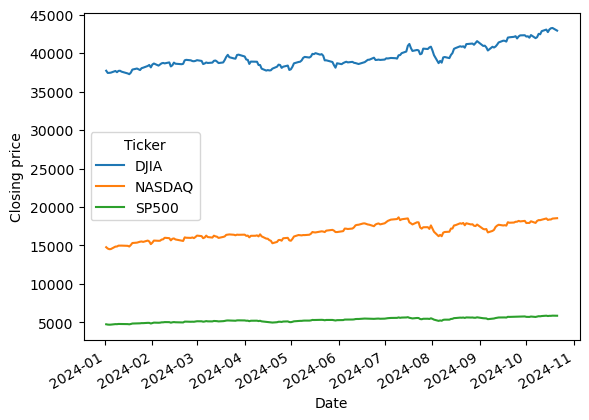

In [5]:
# Plot all three indices, setting a label for the y-axis.
df.plot(ylabel='Closing price')

#### Part (4)

One way to normalize each column by its first value is to select the first row and divide the data by this row:

In [6]:
# Use .iloc[0] to select the first row, divide data by values in first row.
df_norm = df / df.iloc[0]

You can use `head()` to verify that the first normalized element of each column is now 1.

In [7]:
df_norm.head(3)

Ticker,DJIA,NASDAQ,SP500
Date,,,
2024-01-02,1.000000,1.000000,1.000000
2024-01-03,0.992449,0.988236,0.991988
2024-01-04,0.992716,0.982690,0.988593


Finally, we plot the normalized indices just like in the previous sub-question. It is now much easier to see that these indices moved very similarly over this year.

<Axes: xlabel='Date', ylabel='Normalized value'>

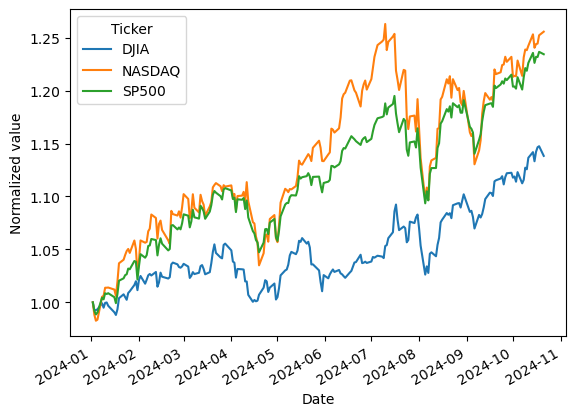

In [8]:
df_norm.plot(ylabel='Normalized value')

#### Part (5)

We use the [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) method to compute the relative difference between two consecutive closing prices.

In [9]:
# Relative difference from previous closing price in percent
df_returns = df.pct_change() * 100.0

Because we cannot compute a difference for the very first observation, this value is set to `NaN`.

In [10]:
df_returns.head(3)

Ticker,DJIA,NASDAQ,SP500
Date,,,
2024-01-02,NaN,NaN,NaN
2024-01-03,-0.755137,-1.176359,-0.801214
2024-01-04,0.026984,-0.561259,-0.342204


<Axes: xlabel='Date', ylabel='Daily return in %'>

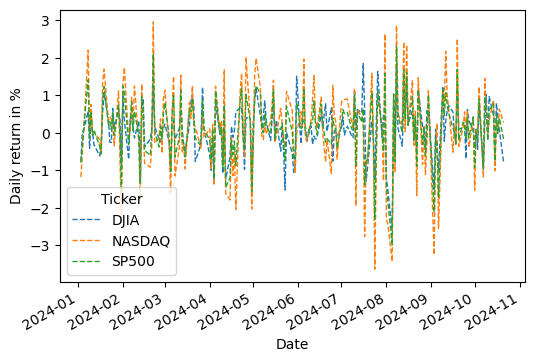

In [11]:
# use dashed lines since daily returns are overlapping
df_returns.plot(ylabel='Daily return in %', lw=1.0, ls='--', figsize=(6, 4))

#### Part (6)

To compute the pairwise correlation between all columns, we call [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). The results show that all three daily returns are highly correlated, which is what we would have expected from looking at the time series of daily returns we plotted earlier.

Note that in all these operations, the `NaN` in the first row are automatically excluded.

In [12]:
df_corr = df_returns.corr()
df_corr

Ticker,DJIA,NASDAQ,SP500
Ticker,,,
DJIA,1.000000,0.651024,0.808597
NASDAQ,0.651024,1.000000,0.959787
SP500,0.808597,0.959787,1.000000


Recall that the correlation coefficient is normalized onto the interval $[-1, 1]$. A positive value means that two variables co-move in the same direction, whereas the opposite is true for a negative value. An absolute value close to 1 means that this co-movement is particularly strong, whereas values around zero mean that there is almost no co-movement.

We can plot the pairwise correlations using the [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) from the module `pandas.plotting` which takes a `DataFrame` as its argument and creates pairwise scatter plots for all columns. The function either plots a histogram or a kernel density plot along the main diagonal, since creating a scatter plot of one and the same variable against itself just yields a diagonal line!

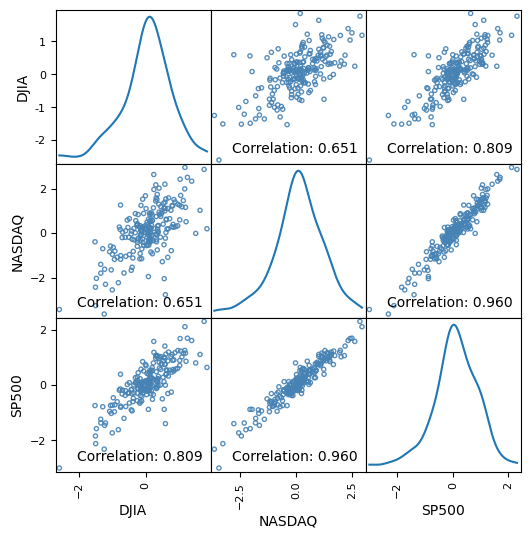

In [13]:
from pandas.plotting import scatter_matrix

# Create figure with 3x3 scatter plots. Main diagonal shows kernel density
# for each index.
axes = scatter_matrix(df_returns, 
        figsize=(6, 6), 
        alpha=0.9, 
        color='none', 
        edgecolors='steelblue', 
        diagonal='kde'
    )

# Iterate over subplots, add correlation text to each off-diagonal panel
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        # Skip diagonal panels, correlation is 1.0 by construction
        if i == j:
            continue
        ax = axes[i, j]
        c = df_corr.iloc[i, j]
        ax.text(0.95, 0.05, f'Correlation: {c:.3f}', 
            transform=ax.transAxes, va='bottom', ha='right'
        )

Alternatively, we can create the 3-by-3 scatter plots manually. We first ask Matplotlib to create a figure with 3-by-3 panels and then iterate over rows and columns, using `ax.scatter()` to add the bivariate scatter plot to each panel.

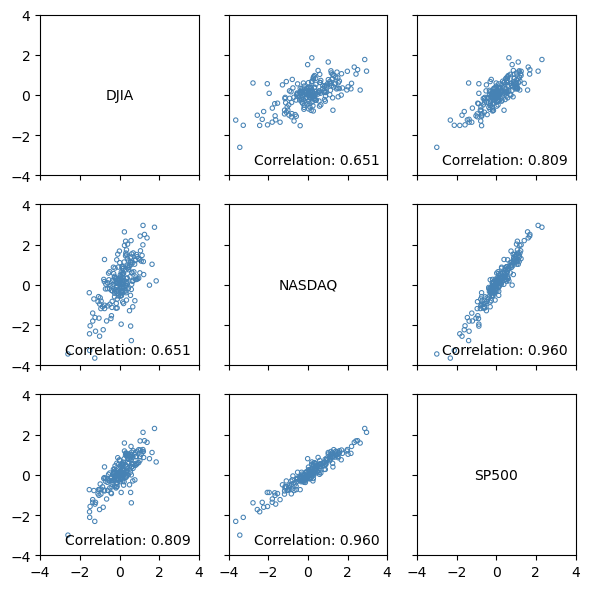

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 3, figsize=(6, 6), sharex=True, sharey=True)

# Index names used as labels along the diagonal
labels = df_returns.columns.to_list()

# Iterate over rows and columns
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):

        ax = axes[i, j]

        # For diagonal panels, print the index name instead of
        # (exactly diagonal) scatter plot.
        if i == j:
            ax.text(0.5, 0.5, labels[i], transform=ax.transAxes, 
                va='center', ha='center')
            continue

        # Get x- and y-values for this panel
        xvalues = df_returns.iloc[:, j]
        yvalues = df_returns.iloc[:, i]

        ax.scatter(xvalues, yvalues, s=10, alpha=1.0, lw=0.75,
            color='none', edgecolors='steelblue')

        # Set uniform x- and y-ticks for all axes
        ticks = np.linspace(-4, 4, 5)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)

        # Add correlation to any off-diagonal graphs
        if i != j:
            c = df_corr.iloc[i, j]
            ax.text(0.95, 0.05, f'Correlation: {c:.3f}', 
                transform=ax.transAxes, va='bottom', ha='right'
            )

fig.tight_layout()

# Exercise: Long-run returns of the S&P 500

For this question, we restrict our attention to the S&P 500 stock market index and examine its long-run annual returns.
Use the data from `SP500.csv` from the folder `../data/stockmarket` to solve the following tasks:

1.  Load the CSV data and set the `Date` column as the index.

    *Hint:* You should use `pd.read_csv(..., parse_dates=['Date'])` to automatically parse strings stored in the `Date` column as dates.

2.  You are interested in computing annual returns, but the data you just loaded contains daily observations.
    For each calendar year, select the first observation to get an annualized time series.

    _Hint_: Use the [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method to aggregate by year. 
3.  Compute the annual returns of the S&P 500, defined as the relative change from the previous-year's price on the first trading day
    (e.g., using [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)).
    Plot the resulting annual return time series. 
4.  What are the mean and standard deviation of annual returns?
    Indicate the average annual returns over this period using a horizontal line in the plot you previously created.

## Solution

#### Part (1)

In [15]:
# Uncomment this to use files in the local data/stockmarket directory
DATA_PATH = '../data/stockmarket'

# Uncomment this to load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/TECH2-H24/main/data/stockmarket'

In [16]:
import pandas as pd

# Path to CSV file
fn = f'{DATA_PATH}/SP500.csv'

# Load S&P 500 data, set Date column as index
df = pd.read_csv(fn, parse_dates=['Date'], index_col='Date')

# Print first 5 rows
df.head(5)

,SP500
Date,
1950-01-03,16.7
1950-01-04,16.9
1950-01-05,16.9
1950-01-06,17.0
1950-01-09,17.1


#### Part (2)

To aggregate to annual frequency, we use `resample('YS')` and use `first()` to select the first observation of each calendar year. The string 'YS' tells pandas that you want to use the _year start_ as the index of the resulting aggregated time series, i.e., January 1 of each calendar year.

In [17]:
# Select first row for each calendar year, use year start (YS) aggregation method
yearly = df.resample('YS').first()

yearly.head(5)

,SP500
Date,
1950-01-01,16.7
1951-01-01,20.8
1952-01-01,23.8
1953-01-01,26.5
1954-01-01,25.0


#### Part (3)

In [18]:
# Compute annual returns in percent
returns = yearly.pct_change() * 100.0

# Print first 5 rows
returns.head(5)

,SP500
Date,
1950-01-01,NaN
1951-01-01,24.550898
1952-01-01,14.423077
1953-01-01,11.344538
1954-01-01,-5.660377


To plot the return series, we use the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) method.

<Axes: xlabel='Date', ylabel='Annual return on S&P 500 in %'>

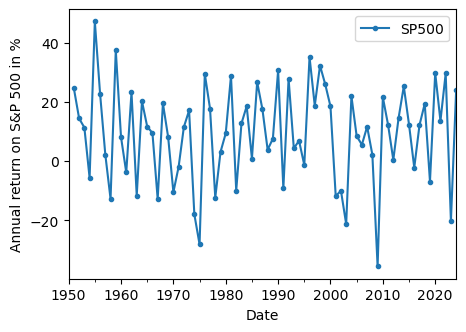

In [19]:
import matplotlib.pyplot as plt 

returns.plot(ylabel='Annual return on S&P 500 in %', 
    marker='o', 
    markersize=3,
    figsize=(5, 3.5), 
    label='Annual return'
)

#### Part (4)

We first compute the mean and standard deviation of the return series:

In [20]:
# Compute mean and std. dev. of return time series, extract first (and only) element
mean = returns.mean().iat[0]
std = returns.std().iat[0]

print(f'Mean: {mean:.2f}%, Standard deviation: {std:.2f}%')

Mean: 9.25%, Standard deviation: 16.52%


Once we have computed the mean, we can recreate the plot and add a horizontal line indicating the average return.

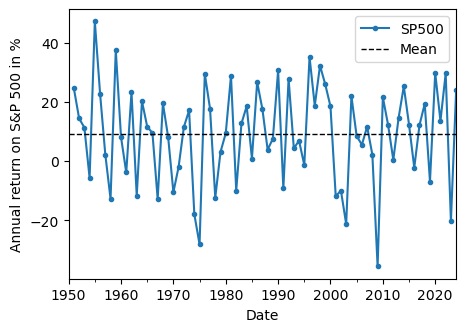

In [21]:
import matplotlib.pyplot as plt 

# Plot return time series, store Axes object returned by plot()
ax = returns.plot(ylabel='Annual return on S&P 500 in %', 
    marker='o', 
    markersize=3,
    figsize=(5, 3.5), 
    label='Annual return'
)

# Add horizontal line at sample mean
ax.axhline(mean, lw=1.0, ls='--', color='black', label='Mean')

# Add legend
plt.legend()

# Exercise: Daily returns of Apple, Nvidia and Tesla

In this exercise, you are asked to compute various statistics of daily returns for selected stocks and plot these as bar charts. 
You'll be using data from files located in the folder `../data/stockmarket`.

1.  Load the price data for Apple Inc (`AAPL.csv`), Nvidia Inc (`NVDA.csv`) and Tesla Inc (`TSLA.csv`). Set the `Date` column as the index and merge these data sets
    into a single DataFrame, keeping only those dates for which you have observations on all three stocks. Restrict your data to the calendar years 2015-2023.

    *Hint:* All three time series have a `Price` column which you should rename to the respective ticker symbol (e.g., `AAPL`) before merging the data 
    to avoid overlapping column names.

    *Hint:* You should use `pd.read_csv(..., parse_dates=['Date'])` to automatically parse strings stored in the `Date` column as dates.

2.  Compute the average daily returns for each of the three stocks, e.g., using 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html). For simplicity, we assume 
    that daily returns are defined as the percentage change vs. the previous observation even though these may be multiple days apart.

    Compute the average daily returns, the standard deviation of daily returns, and the 
    [Sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio) 
    of daily returns by calendar year (using 
    [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)).
    For this exercise, we define Sharpe ratio as the ratio of average returns divided by their standard deviation.

3.  Create three figures visualizing these statistics. Each figure should contain a bar chart that shows one of the statistics (mean, std. deviation, Sharpe ratio)
    for all three companies by calendar year. Properly label your figures (using labels for x-axis, y-axis and titles), and add a horizontal line 
    at zero for the figures depicting average returns and the Sharpe ratio.

## Solution

#### Part (1)

In [22]:
# Uncomment this to use files in the local data/stockmarket directory
DATA_PATH = '../data/stockmarket'

# Uncomment this to load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/TECH2-H24/main/data/stockmarket'

In [23]:
import pandas as pd 

symbols = ['AAPL', 'NVDA', 'TSLA']

data = []

for symbol in symbols:
    # path to file containing data for current ticker symbol
    path = f'{DATA_PATH}/{symbol}.csv'
    print(f'Loading data from {path}')
    
    # Load data & set index
    df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')

    # Rename Price column to current ticker 
    df = df.rename(columns={'Price': symbol})

    data.append(df)

# concatenate data along column axis, keep only intersection of rows present 
# in all data sets
df = pd.concat(data, axis=1, join='inner')

# Restrict to desired calendar years
df = df.loc['2015':'2023']

# Print first 5 observations
df.head(5)

Loading data from ../data/stockmarket/AAPL.csv
Loading data from ../data/stockmarket/NVDA.csv
Loading data from ../data/stockmarket/TSLA.csv


,AAPL,NVDA,TSLA
Date,,,
2015-01-02,24.3740,0.4832,14.6207
2015-01-05,23.6873,0.4750,14.0060
2015-01-06,23.6895,0.4606,14.0853
2015-01-07,24.0217,0.4594,14.0633
2015-01-08,24.9447,0.4767,14.0413


#### Part (2)

In [24]:
# Daily returns
df_returns = df.pct_change() * 100.0

With these daily returns, we can compute the statistics of interest.

In [25]:
# Compute average daily returns by year
means = df_returns.resample('YE').mean()

# Compute std. deviation of daily returns by year
std = df_returns.resample('YE').std()

# Compute sharpe ratio (by year)
sharpe = means/std

# Tabulate sharpe ratio
sharpe

,AAPL,NVDA,TSLA
Date,,,
2015-12-31,0.003432,0.103916,0.026839
2016-12-31,0.039089,0.172739,-0.006592
2017-12-31,0.147563,0.106357,0.078500
2018-12-31,-0.003162,-0.031413,0.025262
2019-12-31,0.161827,0.101453,0.044762
2020-12-31,0.095517,0.105093,0.178591
2021-12-31,0.082575,0.128031,0.063443
2022-12-31,-0.043119,-0.049994,-0.078403
2023-12-31,0.131216,0.174980,0.099487


#### Part (3)

Before creating the bar charts, it is advisable to replace the index with simple calendar years since these look better on the resulting graphs.

In [26]:
df

,AAPL,NVDA,TSLA
Date,,,
2015-01-02,24.3740,0.4832,14.6207
2015-01-05,23.6873,0.4750,14.0060
2015-01-06,23.6895,0.4606,14.0853
2015-01-07,24.0217,0.4594,14.0633
2015-01-08,24.9447,0.4767,14.0413
...,...,...,...
2023-12-22,192.8681,48.8195,252.5400
2023-12-26,192.3202,49.2684,256.6100
2023-12-27,192.4198,49.4064,261.4400


In [27]:
# Convert index to calendar year for nicer graphs
for df in (means, std, sharpe):
    # Extract calendar year from index, store in Year column
    df['Year'] = df.index.year
    
    # Update index in place
    df.set_index('Year', inplace=True)

In [28]:
means

,AAPL,NVDA,TSLA
Year,,,
2015,0.005789,0.226276,0.065759
2016,0.057467,0.511696,-0.016096
2017,0.163655,0.270580,0.174788
2018,-0.005726,-0.097327,0.093199
2019,0.266460,0.259492,0.139070
2020,0.280691,0.382770,1.004671
2021,0.130573,0.362835,0.218843
2022,-0.096961,-0.199094,-0.329306
2023,0.167797,0.533819,0.338746


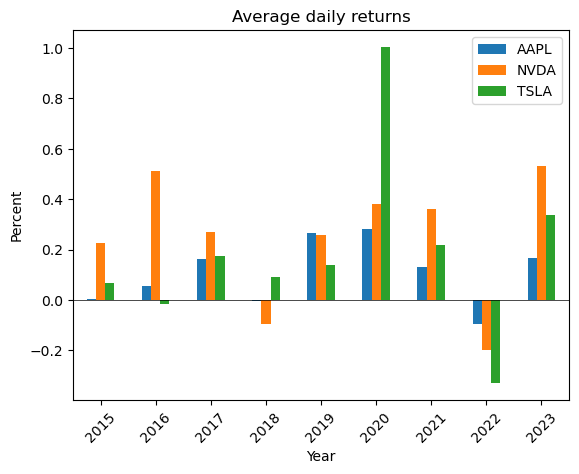

In [29]:
# Plot average daily return by year and ticker
ax = means.plot.bar(
    y=['AAPL', 'NVDA', 'TSLA'], 
    rot=45, 
    title='Average daily returns', 
    ylabel='Percent'
)
ax.axhline(0.0, lw=0.5, color='black')

In [30]:
std

,AAPL,NVDA,TSLA
Year,,,
2015,1.686591,2.177488,2.450163
2016,1.470176,2.962247,2.441811
2017,1.109057,2.544078,2.226595
2018,1.810573,3.098361,3.689225
2019,1.646568,2.557758,3.106864
2020,2.938656,3.642211,5.625539
2021,1.581272,2.833957,3.449418
2022,2.248662,3.982354,4.200183
2023,1.278789,3.050750,3.404941


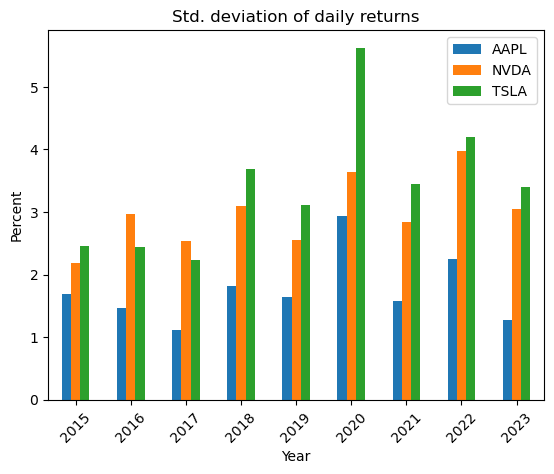

In [31]:
# Plot std. deviation of daily returns by year and ticker
ax = std.plot.bar(
    y=['AAPL', 'NVDA', 'TSLA'], 
    rot=45, 
    title='Std. deviation of daily returns', 
    ylabel='Percent'
)

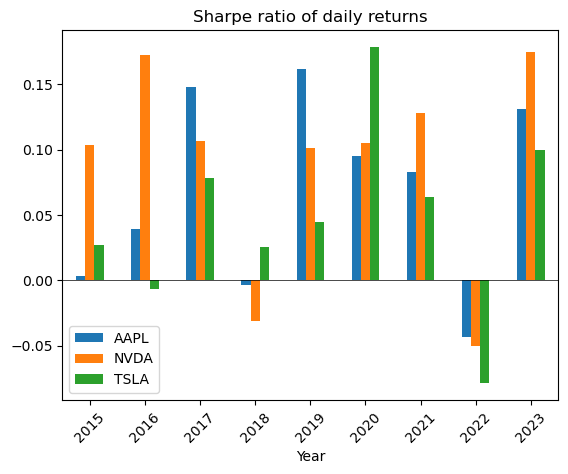

In [32]:
# Plot sharpe ratio daily returns by year and ticker
ax = sharpe.plot.bar(
    y=['AAPL', 'NVDA', 'TSLA'], 
    rot=45, 
    title='Sharpe ratio of daily returns'
)
ax.axhline(0.0, lw=0.5, color='black')